### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [48]:
data = pd.read_csv('data/coupons.csv')

In [49]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [50]:
#print(data.shape)
#print(data["maritalStatus"].value_counts())
#Observation:
# Data seems to have a proper distribution of data -married vs Single vs unmarried vs divorced, 
# much less of a data sample of Divorced and widowed. (or) probably due to the fact that Divorced/Widowed go less often out to socialize.

# print(data["gender"].value_counts())
#Observation:
# Data has almost equal number of male vs female

#print(data["occupation"].value_counts())
#Observation:
# Unemployed & Student people tend to be more on the road compared to people with other occupation
# Probably with the invent of gig economy, Uber and Lyft thsi group commutes more on trips and represent the 
# close to 27% of the sample dataset. worth exploring histograms of the occupation vs count.

#print(data["income"].value_counts())
#Observation:
# Dataset is primerily of < $125K, It seems to suggest either the data set is not in prime income density location or the
# groups that are travelling is more of younder crowd servicing the rich population.

#print(data["passanger"].value_counts())
#print(data["CarryAway"].value_counts().sum())
# Alone - passengers does not qualify what they are doing while travelling
# Nan on the carryaway can skipped out while analyzing, It represent  only 1%, This column with rows on carryAway with Null data can be safely ignored for analysis.

#print(data.isnull().sum())
# car column is almost empty with null values and can be safely ignored,  99% has null values in it.
# Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 & Restaurant20To50 have minimal null counts ( If relevant for data analysis, < 1% and those rows can be dropped)
#print(data["coupon"].value_counts()) # could be used ater for further analysis.



3. Decide what to do about your missing data -- drop, replace, other...

In [51]:
#print(data.isnull().sum())       # car column has 12576 null values.
#print(data["car"].value_counts()) # Very few filled values in terms of records or rows and can be safely dropped.
# Value counts on car column. --- 
#Scooter and motorcycle                      22
#Mazda5                                      22
#do not drive                                22
#crossover                                   21
#Car that is too old to install Onstar :D    21

data = data.drop('car', axis = 1) # Dropping car column which adds minimal value to analysis.
print(data.shape)  # validates column car dropping now the coluns is 25 ( reduced from 26)

(12684, 25)


4. What proportion of the total observations chose to accept the coupon? 



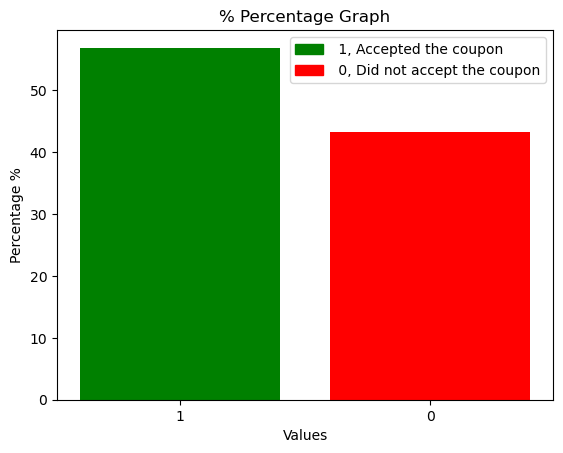

In [52]:
#Argument  normalize=True converts the value_counts of each value in data["Y"] to percentages. 
value_counts = data['Y'].value_counts(normalize=True) * 100
# Plotting the percentage graph with annotations
plt.bar(value_counts.index.astype(str), value_counts.values, color=['green', 'red'])
legend_labels = {0: ' 0, Did not accept the coupon', 1: ' 1, Accepted the coupon'}
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in ['green', 'red']]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index])
plt.xlabel('Values')
plt.ylabel('Percentage %')
plt.title('% Percentage Graph')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

In [91]:
import plotly.express as px
# Calculate the value counts of copons column.
data_coupons = data["coupon"].value_counts()


# Create coupons with value counts to a sample DataFrame
df = pd.DataFrame(data_coupons)


# Create the bar plot using Plotly
fig = px.bar(df, x=df.index, y=df["coupon"])

# Customize the plot layout
fig.update_layout(
    xaxis_title='Coupon Category with number of coupons offered',
    yaxis_title='Count',
    title='Bar Plot of number of coupons offered by Category'
)

# Display the plot
fig.show()

6. Use a histogram to visualize the temperature column.

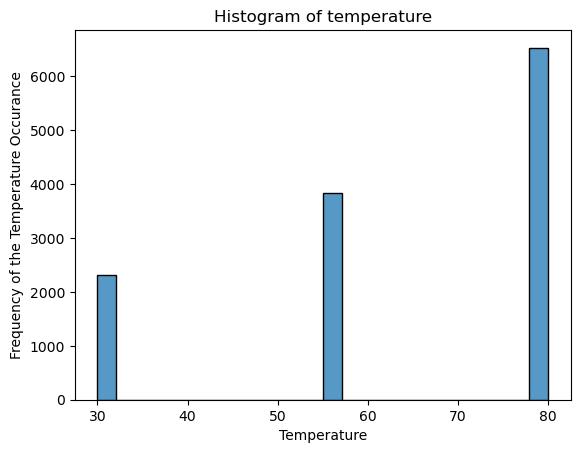

In [92]:
# Create a histogram with hue using Seaborn
sns.histplot(data=data, x=data['temperature'], multiple='stack', legend=True)
# Add labels and plot title
plt.xlabel('Temperature')
plt.ylabel('Frequency of the Temperature Occurance')
plt.title('Histogram of temperature')
# Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [93]:
data_coupons_bar_with_rest = data[data['coupon'].str.contains("Bar")]
bar_y_or_n = data_coupons_bar_with_rest[['coupon', 'Y']].reset_index()





2. What proportion of bar coupons were accepted?


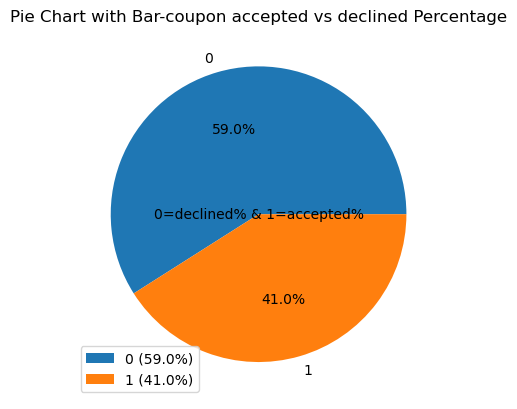

In [94]:
bar_y_or_n = data_coupons_bar_with_rest[['coupon', 'Y']].reset_index()

# Calculate the value counts and percentages
value_counts = bar_y_or_n['Y'].value_counts()
percentages = value_counts / len(bar_y_or_n) * 100


# Plot the pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

# Add percentage legends
legend_labels = [f"{value} ({percent:.1f}%)" for value, percent in zip(value_counts.index, percentages)]
plt.legend(legend_labels)
description = "0=declined% & 1=accepted%"
plt.annotate(description, (0.5, 0.5), xycoords='axes fraction', ha='center', va='center')
# Add a title
plt.title('Pie Chart with Bar-coupon accepted vs declined Percentage')

# Display the chart
plt.show()

# Observation
# 59% of the Bar coupon was declined and 41% of the Bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [57]:
#Checking for value counts and null entriesin in the column Bar in the dataframe.
#print (data["Bar"].value_counts())
#print (data["Bar"].isnull())

# Checking for specific values in the 'Name' column
bar_eq_or_lt3 = ['never', 'less1', '1~3']
bar_gt3 = ['4~8', 'gt8']
bareqlt3 = data[data['Bar'].isin(bar_eq_or_lt3)]
bargt3 = data[data['Bar'].isin(bar_gt3)]


value_counts_bareqlt3 = bareqlt3['Y'].value_counts(normalize=True) * 100
value_counts_bargt3 = bargt3['Y'].value_counts(normalize=True) * 100


# Graph on % acceptance on Bar customers visiting <= 3 times a month
#--------------------------------------------------------------------------------------------------------
import plotly.graph_objects as go
colors = [ 'green', 'red']
fig1 = go.Figure(data=go.Bar(x=value_counts_bareqlt3.index.astype(str), y=value_counts_bareqlt3.values, text=value_counts_bareqlt3.values, textposition='auto', marker=dict(color=colors)))

# Customizing the layout 
fig1.update_layout(title='% Percentage Graph,Bar customers monthly visit <= 3 times a month',
                  xaxis_title='Acceptance - Yes(1) or No(0)',
                  yaxis_title='Percentage %')
# Displaying the graph
fig1.show()
#>>
#Observation:
# Customers that frequented the bar <= 3 times a month accepted the coupon  ~56% of the time.
# It says one in two people still accepted the coupons  
# acceptance rate is more than 50% or almost same as a fare coin toss

# Graph on % acceptance on Bar customers visiting > 3 times a month
#-------------------------------------------------------------------
#>>

# Creating a bar graph with values displayed
colors = [ 'green', 'red']
fig2 = go.Figure(data=go.Bar(x=value_counts_bargt3.index.astype(str), y=value_counts_bargt3.values, text=value_counts_bargt3.values, textposition='auto', marker=dict(color=colors)))

# Customizing the layout
fig2.update_layout(title='% Percentage Graph,Bar customers monthly visit > 3 times a month',
                  xaxis_title='Acceptance - Yes(1) or No(0)',
                  yaxis_title='Percentage %')

# Displaying the graph
fig2.show()
#>>

#Observation:
# Customers that frequented the bar > 3 times a month accepted the coupon  ~62% of the time. ( closer ro 66%)
# It says almost 2 of 3 people accepted the coupons ( almost 2 / 3rd acceptance rate)  
# acceptance rate is ~62% or almost 2/3rd's.
#--------------------------------------------------------------------------------------------------------------

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [95]:

# Data Observation: One disclamer to the data the bar visit captured can be equal to or greater 1 time.
# filter the dataframe that contains data with just bar visits once or more than once a month.
bar_gt_1_vlues = ['1~3', '4~8', 'gt8']
bargt1 = data[data['Bar'].isin(bar_gt_1_vlues)]


#Dataframe with just age groups over 25 , who have visited the bar greater than once.
exclude_age_grp = ['below21', '21']
bargt1_age_gt_25 = bargt1[~bargt1['age'].isin(exclude_age_grp)]

bargt1_age_gt_25_y_1_count = bargt1_age_gt_25['Y'].value_counts()[1]
#print("Bar visit's >1, age > 25 = ", bargt1_age_gt_25_y_1_count)
total_count = data.shape[0]
#print("Total count = ", total_count)

# acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others
#bar_gt1_age_gt25_accepted_per = (bargt1_age_gt_25_y_1_count/(total_count - bargt1_age_gt_25_y_1_count))*100
bar_gt1_age_gt25_accepted_per_vs_total = (bargt1_age_gt_25_y_1_count/(total_count))*100
#print("Acceptnce, Bar visitors greater then once and above 25 yrs % to total", bar_gt1_age_gt25_accepted_per_vs_total)

#rest_of_data = df[~df.index.isin(subset.index)] , syntax reference
rest_of_data = data[~data.index.isin(bargt1_age_gt_25.index)]
others_count = rest_of_data.shape[0] # Count of others who visited the bar once or less than once and age less than 25
#print("Others count", others_count)
bar_gt1_age_gt25_accepted_per_vs_others =  (bargt1_age_gt_25_y_1_count/(others_count))*100
#print("Acceptnce, Bar visitors greater then once and above 25 yrs % to others", bar_gt1_age_gt25_accepted_per_vs_others)

x_values = ['Age_GT25_Vist_GT1_vs_total(1)', 'Age_GT25_Vist_GT1_vs_others(1)']
y_values = [bar_gt1_age_gt25_accepted_per_vs_total, bar_gt1_age_gt25_accepted_per_vs_others ]

colors = [ 'green', 'green']
fig3 = go.Figure(data=go.Bar(x=x_values, y=y_values, text=y_values, textposition='auto', marker=dict(color=colors)))

# Customizing the layout
fig3.update_layout(title='Acceptance % Percentage Graph of Bar visitors visit >1 and age > 25 vs Everyone and vs Others',
                  xaxis_title='Coupon Acceptance comparisons',
                  yaxis_title='Percentage % of coupon acceptance')

# Displaying the graph
fig3.show()

#Observation:
#13.60% acceptance  among people(who visit the bar >1 time and are older than 25 yrs) compared to total sampling data set.
#17.42% acceptance among people(who visit the bar >1 time and are older than 25 yrs) compared to all-others in data set.



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [62]:
#print(data.shape)
#Checking for value counts and null entriesin in the column Bar in the dataframe.
#print (data["Bar"].value_counts())
#print (data["Bar"].isnull())
bar_gt_1_vlues = ['1~3', '4~8', 'gt8']
bargt1 = data[data['Bar'].isin(bar_gt_1_vlues)]

#Checking for total rows, value counts and null entriesin in the column passanger in the dataframe.
#print (data["passanger"].value_counts())
#print (data["passanger"].value_counts().sum())
#print ("Is null in passanger column:", data["passanger"].isnull().sum())
pass_notkids = ['Alone', 'Friend(s)', 'Partner']
bargt1_no_kids = data[data['passanger'].isin(pass_notkids)]
#print(bargt1_no_kids.shape)

#Observation
# Data sample, visitors to the bar more than once seem to not have kids during transportation.

# checking for occupation in dataframe, including just bar visitors > once, travelling with no kids and excluding occupation
# 'Farming Fishing & Forestry'
#print (data["occupation"].value_counts())
#print ("Is null in occupation column:", data["occupation"].isnull().sum())
exclude_occupation = ['Farming Fishing & Forestry']
#bargt1_age_gt_25 = bargt1[~bargt1['age'].isin(exclude_age_grp)]
bargt1_no_kids_exclude = bargt1_no_kids[~bargt1_no_kids['occupation'].isin(exclude_occupation)]
#print(bargt1_no_kids_exclude['occupation'].value_counts())
#print(bargt1_no_kids_exclude.shape)

val_counts_bargt1_no_kids_exclude = bargt1_no_kids_exclude['Y'].value_counts(normalize=True) * 100



# Creating a bar graph with values displayed
colors = [ 'green', 'red']
fig4 = go.Figure(data=go.Bar(x=val_counts_bargt1_no_kids_exclude.index.astype(str), y=val_counts_bargt1_no_kids_exclude.values, text=val_counts_bargt1_no_kids_exclude.values, textposition='auto', marker=dict(color=colors)))

# Customizing the layout
fig4.update_layout(title='Acceptance %Percentage Graph,Bar customers monthly visit > 1 time (no kids, not Farming, Fishing or Forestry)', xaxis_title='Acceptance - Yes(1) or No(0)', yaxis_title='Percentage %')

# Displaying the graph
fig4.show()
#>>
#Observation
# 57% of the people travelling with no kids in the car and visits > 1 time to the bar seem to accept coupons
# more than 50% and declines just below 50% 42.6%.
# Farming, fishing an forestry seem to be a ssmall sample in the dataset ( ~ 43) and have been take out of the analysis.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [67]:
#-----
bar_gt_1_vlues = ['1~3', '4~8', 'gt8']
bargt1 = data[data['Bar'].isin(bar_gt_1_vlues)]

pass_notkids = ['Alone', 'Friend(s)', 'Partner']
bargt1_no_kids = data[data['passanger'].isin(pass_notkids)]

exclude_grp = ['Widowed']
bargt1_no_kids_notwidow = bargt1_no_kids[~bargt1_no_kids['maritalStatus'].isin(exclude_grp)]
value_counts_BarGT1_nkids_nwidow = bargt1_no_kids_notwidow['Y'].value_counts(normalize=True) * 100

value_counts_bargt1_no_kids_notwidow_y_1 = bargt1_no_kids_notwidow.query('Y == 1')
#value_counts_bargt1_no_kids_notwidow_y_1.head()

# Creating a bar graph with values displayed
colors = [ 'green', 'red']
fig5 = go.Figure(data=go.Bar(x=value_counts_BarGT1_nkids_nwidow.index.astype(str), y=value_counts_BarGT1_nkids_nwidow.values, text=value_counts_BarGT1_nkids_nwidow.values, textposition='auto', marker=dict(color=colors)))
# Customizing the layout
fig5.update_layout(title='Acceptance %Percentage Graph,Bar customers monthly visit > 1 time (no kids, not Wodowed)', xaxis_title='Acceptance - Yes(1) or No(0)', yaxis_title='Percentage %')
# Displaying the graph
fig5.show()

def create_barplot(data_index, data_values, title_desc):

    plt.figure(figsize=(8, 6))
    plt.bar(data_index, data_values)
    plt.xlabel(title_desc)
    plt.ylabel('count')
    plt.title(title_desc)
    plt.xticks(rotation=45)
    plt.show()

def create_acceptprob_barplot(val_index, values, title_desc):

    colors = [ 'green', 'red']
    fig5 = go.Figure(data=go.Bar(x=val_index.astype(str), y=values, text=values, textposition='auto', marker=dict(color=colors)))
    fig5.update_layout(title=title_desc , xaxis_title='Acceptance - Yes(1) or No(0)', yaxis_title='Percentage %')
    fig5.show()

#-----
#bargt1_no_kids_notwidow - (DataFrame)group go to bars more than once a month, no kid in passengers and not widowed
include_age = ['26', '21']
bargt1_age_lt30 = bargt1[bargt1['age'].isin(include_age)]
#bargt1_age_lt30 - (DataFrame)group go to bars more than once a month and age under 30.
#print(data['coupon'].value_counts())
include_cheap_rest = ['Restaurant(<20)']
only_cheap_rest = data[data['coupon'].isin(include_cheap_rest)]
income_list_lt50k = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999']
cheap_rest_lt50k = only_cheap_rest[only_cheap_rest['income'].isin(income_list_lt50k)]
#print(cheap_rest_lt50k['income'].value_counts())
#cheap_rest_lt50k - (DataFrame)cheap restaurants more than 4 times a month and income is less than 50K

#Data Merge to perform Analysis, vertical merge is being done below to include all the records.
#bargt1_no_kids_notwidow - (DataFrame)group go to bars more than once a month, no kid in passengers and not widowed
#bargt1_age_lt30 - (DataFrame)group go to bars more than once a month and age under 30.
#cheap_rest_lt50k - (DataFrame)cheap restaurants more than 4 times a month and income is less than 50K


#-------
bargt1_nokids_notwidow_agelt30 = pd.concat([bargt1_no_kids_notwidow, bargt1_age_lt30], axis=0).reset_index()
#print("bargt1_no_kids_notwidow shape:",bargt1_nokids_notwidow_agelt30.shape)
#print("bargt1_age_lt30 shape:", bargt1_age_lt30.shape)
#print("bargt1_nokids_notwidow_agelt30 shape:",bargt1_nokids_notwidow_agelt30.shape)
bargt1_nokids_notwidow_agelt30_cheap_rest_lt50Kinc = pd.concat([bargt1_nokids_notwidow_agelt30, cheap_rest_lt50k], axis=0).reset_index()
#print("bargt1_nokids_notwidow_agelt30_cheap_rest_lt50Kinc shape:", bargt1_nokids_notwidow_agelt30_cheap_rest_lt50Kinc.shape)
#loc25mincou_y1_counts = value_counts_bargt1_no_kids_notwidow_y_1['toCoupon_GEQ25min'].value_counts(normalize=True) * 100
#create_acceptprob_barplot(loc25mincou_y1_counts.index.astype(str), loc25mincou_y1_counts.values, 'loc25min-to-coupon-destiAccept %Per Graph,Bar customers monthly visit>1 time (no kids,not Wodowed):\nAccept(1) or Decline(0) Probability location-5-min-to-coupon-destination')
bgt1_nKids_nWid_agelt30_chrest_inclt50K_count=bargt1_nokids_notwidow_agelt30_cheap_rest_lt50Kinc['Y'].value_counts(normalize=True) * 100
create_acceptprob_barplot(bgt1_nKids_nWid_agelt30_chrest_inclt50K_count.index.astype(str),bgt1_nKids_nWid_agelt30_chrest_inclt50K_count.values, 'bgt1_nKids_nWid_agelt30_chrest_inclt50K Accept(1)/decline(0) Probability')

loc25mincou_y1_counts_in3abovegrp = bargt1_nokids_notwidow_agelt30_cheap_rest_lt50Kinc['toCoupon_GEQ25min'].value_counts(normalize=True) * 100
loc15mincou_y1_counts_in3abovegrp = bargt1_nokids_notwidow_agelt30_cheap_rest_lt50Kinc['toCoupon_GEQ15min'].value_counts(normalize=True) * 100
loc5mincou_y1_counts_in3abovegrp = bargt1_nokids_notwidow_agelt30_cheap_rest_lt50Kinc['toCoupon_GEQ5min'].value_counts(normalize=True) * 100

create_acceptprob_barplot(loc25mincou_y1_counts_in3abovegrp.index.astype(str), loc25mincou_y1_counts_in3abovegrp.values, 'loc25mincou_y1_counts_in3abovegrp Accept(1)/decline(0) Probability')
create_acceptprob_barplot(loc15mincou_y1_counts_in3abovegrp.index.astype(str), loc15mincou_y1_counts_in3abovegrp.values, 'loc15mincou_y1_counts_in3abovegrp Accept(1)/decline(0) Probability')
create_acceptprob_barplot(loc5mincou_y1_counts_in3abovegrp.index.astype(str), loc5mincou_y1_counts_in3abovegrp.values, 'loc5mincou_y1_counts_in3abovegrp Accept(1)/decline(0) Probability')

# Observation
#In these three groups of people
#bargt1_nokids_notwidow_agelt30,
#bargt1_age_lt30 &
#bargt1_nokids_notwidow_agelt30.

#59.39% accepted the coupon and 40.60% declined the coupons.
#100% of the people accepted the coupon if the coupon destination is 5 mins away 
#53.5% of the people accepted the coupon if the coupn destination is 15 mins away.
#Only 12.5% of the people accepted the coupn if the coupon destination is 25 mins away.
#Conclusion Always offer coupons to the nearest destinations preferably less than 5 min's away.

#-----


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

----------------------


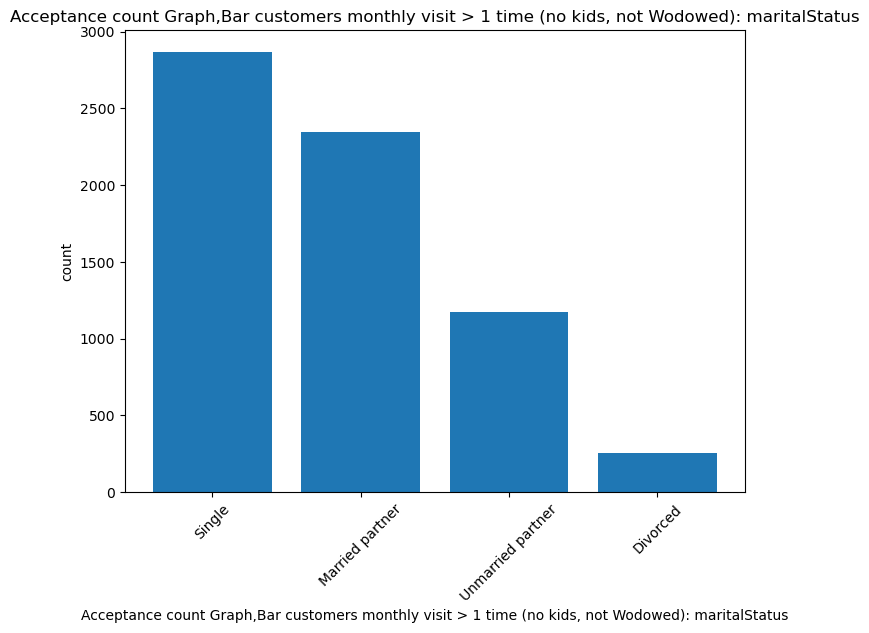

----------------------


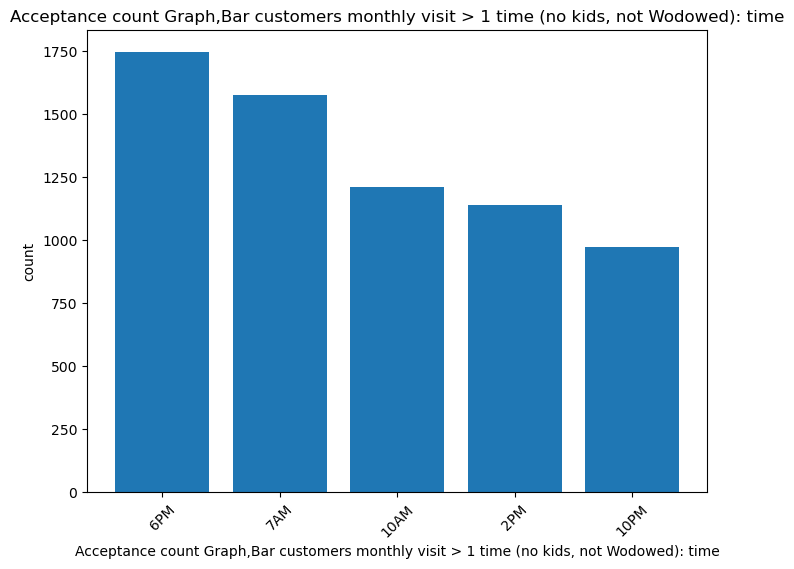

In [68]:
#Customers visiting bars > 1 time, no kids and not wodowed.
#Analysis Graphs of the above higher probability of acceptance

print('----------------------')
#print(value_counts_bargt1_no_kids_notwidow_y_1['maritalStatus'].value_counts())
MS_val_counts = value_counts_bargt1_no_kids_notwidow_y_1['maritalStatus'].value_counts()
#print(MS_val_counts.index, MS_val_counts)
create_barplot(MS_val_counts.index, MS_val_counts, 'Acceptance count Graph,Bar customers monthly visit > 1 time (no kids, not Wodowed): maritalStatus')
print('----------------------')
#print(value_counts_bargt1_no_kids_notwidow_y_1['time'].value_counts())
time_val_counts = value_counts_bargt1_no_kids_notwidow_y_1['time'].value_counts()
create_barplot(time_val_counts.index, time_val_counts, 'Acceptance count Graph,Bar customers monthly visit > 1 time (no kids, not Wodowed): time')

# Observation
#Single, married partner and unmarried partners visiting visitng bar > 1 time seem to overwhelmingly accept coupons.
#Timing of the coupon offer impacts acceptance rate greatly, best times are 6:00PM, 7:00AM and 10:00AM
#It also appears single people, married/unmarried couple seem to visit bar more often and they are the ones who accept the coupon.
#Coupons tend to be accepted wo closer (5 mins drive) locations much more often then others.
# followed by 15 min drive destinations and lastly followed by 25 min drive locations.
            


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

----------------------


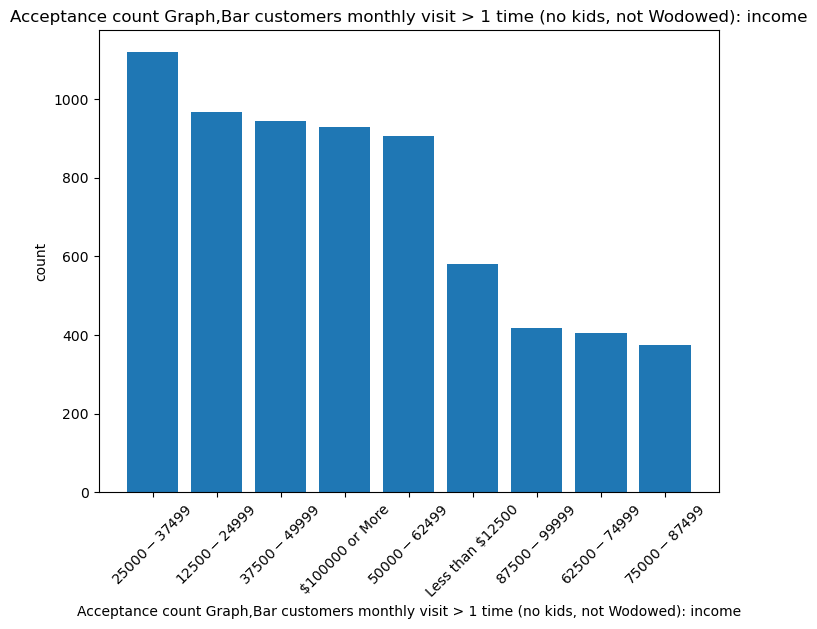

----------------------


In [69]:
#choosing groups bar visits > 1, no kids, not widow below gives the analysis.

print('----------------------')
#print(value_counts_bargt1_no_kids_notwidow_y_1['income'].value_counts())
income_val_counts = value_counts_bargt1_no_kids_notwidow_y_1['income'].value_counts()
create_barplot(income_val_counts.index, income_val_counts, 'Acceptance count Graph,Bar customers monthly visit > 1 time (no kids, not Wodowed): income')

print('----------------------')
#print(value_counts_bargt1_no_kids_notwidow_y_1['toCoupon_GEQ5min'].value_counts())
loc5mincou_y1_counts = value_counts_bargt1_no_kids_notwidow_y_1['toCoupon_GEQ5min'].value_counts(normalize=True) * 100
create_acceptprob_barplot(loc5mincou_y1_counts.index.astype(str), loc5mincou_y1_counts.values, 'loc5min-to-coupon-desti Accept %Per Graph,Bar customers monthly visit>1 time (no kids,not Wodowed):\nAccept(1) or Decline(0) Probability ')

In [70]:
#In the group bar visit > 1, no kids and not wodow

print('----------------------')
#print(value_counts_bargt1_no_kids_notwidow_y_1['toCoupon_GEQ15min'].value_counts())
loc15mincou_y1_counts = value_counts_bargt1_no_kids_notwidow_y_1['toCoupon_GEQ15min'].value_counts(normalize=True) * 100
create_acceptprob_barplot(loc15mincou_y1_counts.index.astype(str), loc15mincou_y1_counts.values, 'loc15min-to-coupon-desti Accept %Per Graph,Bar customers monthly visit>1 time (no kids,not Wodowed):\nAccept(1) or Decline(0) Probability location-5-min-to-coupon-destination')
print('----------------------')
#print(value_counts_bargt1_no_kids_notwidow_y_1['toCoupon_GEQ25min'].value_counts())
#loc25mintocoupon_val_counts = value_counts_bargt1_no_kids_notwidow_y_1['toCoupon_GEQ25min'].value_counts()
#create_barplot(loc25mintocoupon_val_counts.index, loc25mintocoupon_val_counts, 'loc25mintocoupon')
loc25mincou_y1_counts = value_counts_bargt1_no_kids_notwidow_y_1['toCoupon_GEQ25min'].value_counts(normalize=True) * 100
create_acceptprob_barplot(loc25mincou_y1_counts.index.astype(str), loc25mincou_y1_counts.values, 'loc25min-to-coupon-destiAccept %Per Graph,Bar customers monthly visit>1 time (no kids,not Wodowed):\nAccept(1) or Decline(0) Probability location-5-min-to-coupon-destination')
print('----------------------')

#Observation
#If coupon destination is 25 mins away 90% of the customers decline coupons
#If coupon destination is 15 mins away 51.1% accept the coupon and 48.8% decline.
#Infering closer the distance of the coupon bette are the chance of coupon acceptance.


----------------------


----------------------


----------------------


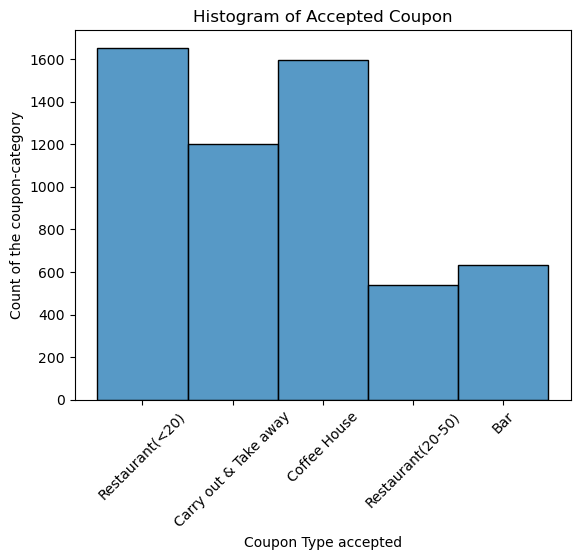

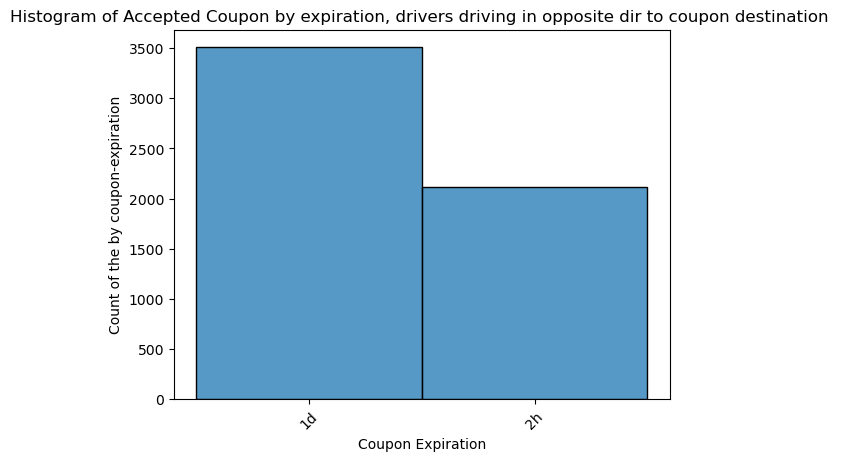

In [90]:
#(Q7)Inspired by the Bar group analysis and motivation. I would like to analyze which group accepted more coupons
#drivers travelling the same direction as coupon destination or opposite ? Whatis the probability ?
#(Q7-A)Among the group that accepted it ? Which 'coupons' were actually accepted more ?
#(Q7-B)What was the expiration period of the coupons that got accepted more and what was the expiration period of 
#the coupons that got declined.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Consolidating coupon accepted group to one datafrme
data_Y_1 = data.query("Y == 1")
# Analyzing which group accepted more coupons driving in the same direction or opposite direction. 
data_Y_1_samedir_count = data_Y_1['direction_same'].value_counts(normalize=True).iloc[[1, 0]] * 100
#.iloc[[1, 0]]) flips the values in the series for consistant visual queues.
create_acceptprob_barplot(data_Y_1_samedir_count.index.astype(str), data_Y_1_samedir_count.values, 'Drivers driving same dir as coupon Destination Acceptance %')
data_Y_1_oppdir_count = data_Y_1['direction_opp'].value_counts(normalize=True) * 100
#print(data_Y_1['direction_opp'].value_counts())
create_acceptprob_barplot(data_Y_1_oppdir_count.index.astype(str), data_Y_1_oppdir_count.values, 'Drivers driving opposite dir as coupon Destination Acceptance %')
# Analyzing what kind of coupons were accepted more ?
# Create a histogram with hue using Seaborn
sns.histplot(data=data_Y_1_oppdir, x=data_Y_1_oppdir['coupon'], multiple='stack', legend=True)
# Add labels and plot title
plt.xlabel('Coupon Type accepted')
plt.xticks(rotation=45)
plt.ylabel('Count of the coupon-category')
plt.title('Histogram of Accepted Coupon')
# Display the plot
plt.show()

# Drivers who accepted coupon but in the opposite direction since they accept more than the same direction drivers.
# Plotting coupon expiry histogram to see what would fare better on coupon acceptance

data_Y_1_oppdir = data_Y_1.query('direction_opp == 1')
sns.histplot(data=data_Y_1_oppdir, x=data_Y_1_oppdir['expiration'], multiple='stack', legend=True)
# Add labels and plot title
plt.xlabel('Coupon Expiration')
plt.xticks(rotation=45)
plt.ylabel('Count of the by coupon-expiration')
plt.title('Histogram of Accepted Coupon by expiration, drivers driving in opposite dir to coupon destination ')
# Display the plot
plt.show()


#Observation:
#Drivers accept more coupons where the coupon destination is in the opposite direction (78%) compared to the coupons
#destination on the same direction (21.9%). This could potentially be because they are more time sensitive to reaching the 
#destination then a detaour or a stop. This could indicate that it may be Gig employees driving Uber or Lyft 
#more focused on getting to the destination satisfying the customer as a goal.

#Among the accepted coupons in the opposite direction restaurant(<20), Coffee House and Carry out & Take away seem to be 
#the mist accepted coupons. This indicates that the population accepting the coupons frequent these places more.
#This cound indicate they are busy folks putting in more hours at work and spend little time on high end restaurants 
#or bars.

#Examining expiration of the coupons 1day coupon seem to be accepted more than the 2hour coupons. People prefer to use 
#the coupon over their prefered time of the day rather than rushed into 2h usage.




